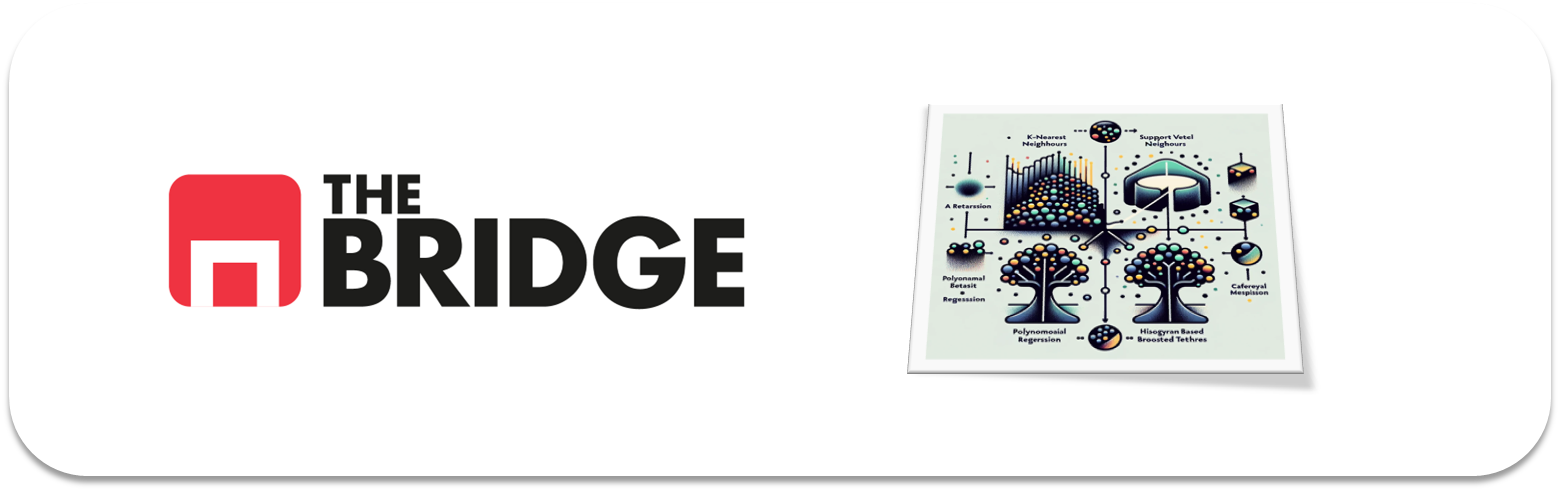

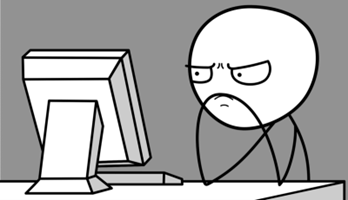

Para hacer un **repaso a los problemas de clasificacion con ML**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### INTRODUCCIóN: PROCESO DE ML

En los siguientes ejercicios vamos a seguir (de nuevo) los pasos básicos en la creación de un modelo de ML para resolver un problema de predicción a partir de un dataset que incluye el target, es decir, un aprendizaje supervisado.

En concreto, vamos a trabajar sobre un problema de clasificación a través de los siguientes pasos:

1. Entendimiento del problema (selección de la métrica más adecuada)  
2. Obtención de datos y primer contacto  
3. Train y Test  
4. MiniEDA: Análisis del target, análisis bivariante, entendimiento de las features, selección de las mismas (si es necesario)  
5. Preparación del dataset de Train: Conversión de categóricas, tratamiento de numéricas  
6. Selección e instanciación de modelos. Baseline.
7. Comparación de modelos (lo haremos por comparación con validación, puedes hacerlo por comparación de modelos de hiperparámetros optimizados, si así lo prefieres)  
8. Selección de modelo: Optimización de hiperparámetros (ten en cuenta la nota de 7)  
9. Equilibrado del train set  
10. Evaluación contra test.  
11. Análisis de errores, posibles acciones futuras.  
12. EXTRA: Persistencia del modelo en disco.  

### El problema

La unidad oncológica del hospital de Madison, Wisconsin, está trabajando en un tratamiento muy prometedor sobre el cáncer de mama. Desgraciadamente es un tratamiento con efectos secundarios y todavía excesivamente caro, pero cuya efectividad es extraordinaria si se aplica en las primeras etpas o incluso antes de haberlo desarrollado. 

En este sentido, la univeridad quiere disponer de un modelo que le permita detectar potenciales pacientes pero con un alto nivel de acierto en detectar quien puede tener cáncer para no aplicar el tratamiento a personas que no fueran a desarrollarlo y por tanto no sólo perder dinero, sino también, y más importante causar problemas a esas personas. 

Nos piden trabajar sobre datos que ya tienen, y que pueden obtener facilmente de cualquier futuro aspirante a las pruebas y ensayos con el tratamiento, de pacientes que desarrollaron y no el cáncer. Sobre ese dataset quieren que les proporcionemos el mejor modelo de predicción de quién desarrollará o no el cáncer y que cumpla con las expectativas del párrafo anterior.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [24]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

### Ejercicio 1: Entendiendo el problema de "Negocio"

En función de la descripción del problema de "negocio" y sin mirar todavía los datos, ¿qué tipo de problema de clasificación vamos a resolver? ¿Qué métricas creess más conveniente para medir el rendimiento del modelo a construir y, por tanto, para comparar posibles modelos entre sí?

*Es un problema de clasificación binaria en nombre miraremos la precisión con balanceo de sensibilidad, buscando especialmente evitar los falsos positivos.*

### Ejercicio 2: Obtención y primer "vistazo"

Carga el dataset, muestra sus primeras filas, su descripción general y determina el tipo de variables que vamos a manejar. Escoge el target y crea una variable `target` y asignalé el nombre de la columna correspondiente.

In [2]:
df = pd.read_csv('./data/wisconsin_cancer.csv', sep='|')
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    float64
 6   compactness_mean        569 non-null    float64
 7   concavity_mean          569 non-null    float64
 8   concave points_mean     569 non-null    float64
 9   symmetry_mean           569 non-null    float64
 10  fractal_dimension_mean  569 non-null    float64
 11  radius_se               569 non-null    float64
 12  texture_se              569 non-null    float64
 13  perimeter_se            569 non-null    float64
 14  area_se                 569 non-null    fl

In [4]:
df.diagnosis.value_counts(True)

diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

In [5]:
# Dataset numérico, limpio y desbalanceado (1/3)
# Target es la única variable de texto, siendo realmente binaria con valores 'malignant' o 'benign' (M o B)

target = 'diagnosis'

NOTA: Para más información sobre el dataset el hospital nos redirige a esta [página web](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download)

### Ejercicio 3: Split

Haz el split en train y test.

In [6]:
set_train, set_test = train_test_split(df, test_size=0.2, random_state=42)

### Ejercicio 4: MiniEDA (I)

Analiza la distribución frecuencial de target brevemente.

In [7]:
# Variable desbalanceada

set_train.diagnosis.value_counts(True)

diagnosis
B    0.628571
M    0.371429
Name: proportion, dtype: float64

### Ejercicio 5: MiniEDA (II)

Analiza bivariantemente las variables contra el target, de forma que veamos las distintas distribuciones para cada clase (puedes emplear la libería gráfica que crees conveniente)

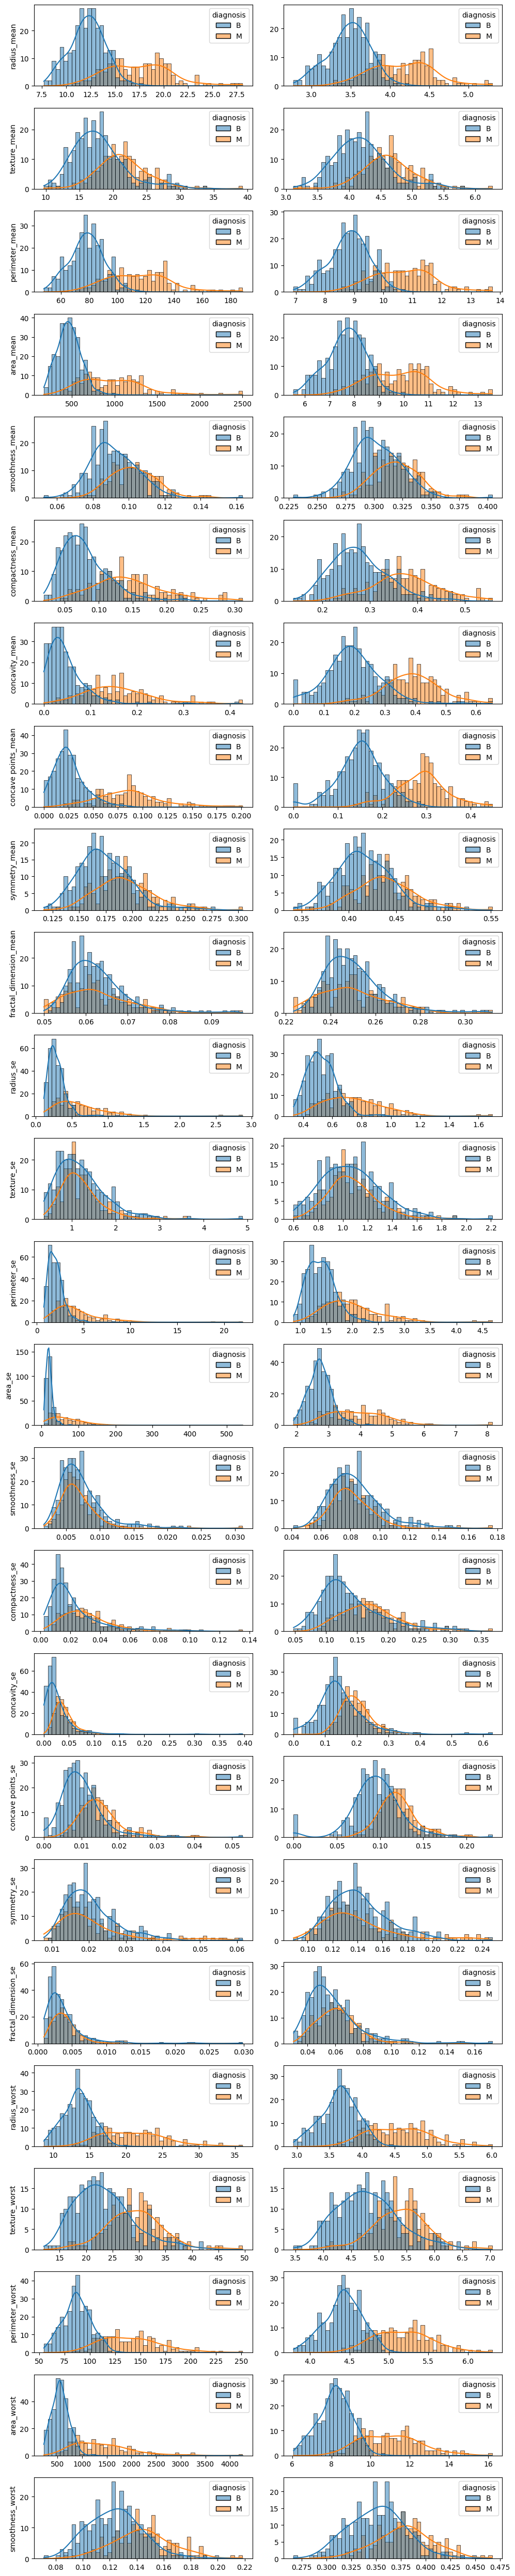

In [8]:
# Vemos la distribución de cada variable respecto a cada valor del target

features = [feature for feature in set_train.columns if feature != target]

fig, ax = plt.subplots(len(features),2, figsize=(10,50))
for index, feature in enumerate(features):
    # Aplicamos raíz cúbica a fatures con altos valores que están desplazadas a la izquierda y raíz cuadrada al resto 
    transform_feature = np.sqrt(set_train[feature]) if feature not in ['area_mean','area_se','perimeter_worst','area_worst'] else np.cbrt(set_train[feature])
    sns.histplot(set_train, x=feature, hue=target, bins=50, kde=True, ax=ax[index, 0])
    sns.histplot(set_train, x=transform_feature, hue=target, bins=50, kde=True, ax=ax[index, 1])
    ax[index, 0].set_xlabel('')
    ax[index, 1].set_xlabel('')
    ax[index, 0].set_ylabel(feature)
    ax[index, 1].set_ylabel('')
plt.tight_layout()

### Ejercicio 6: MiniEDA (III)

Crea una variable de tipo lista a la que asignes los valores de las columnas que creas conveniente emplear como features en función de lo visto en el miniEDA. Haz una lista de modelos/algoritmos que vas a emplear para hacer el modelo (solo los nombres). En función de la lista anterior, ¿tienes que tratar las variables, por qué?

In [9]:
# Descartamos 'texture_se','smoothnes_se' tras primera visualización, ya que no son determinantes
features = [feature for feature in set_train.columns if feature not in [target, 'texture_se','smoothness_se']]

*Valoraremos los siguientes modelos de clasificación binaria:*  
> Regresión logística  
> KNN    
> Random Forest  
> LightGBM  

*La selección de estos modelos responden al tipo de problema y en el caso de LightGBM debido a la alta cardinalidad de los features*  
*Tanto la regresión logística como el KNN son muy sensibles a la escala por lo que deberemos de tratar los datos*  
*Por último, deberemos de modificar los valores del target por 0-1*

In [10]:
# Comprobamos la cardinalidad

for feature in features:
    print(f'{feature}: \n\t\t{set_train[feature].nunique()} \t{round(set_train[feature].nunique()/len(set_train)*100,2)} %')

radius_mean: 
		381 	83.74 %
texture_mean: 
		392 	86.15 %
perimeter_mean: 
		424 	93.19 %
area_mean: 
		431 	94.73 %
smoothness_mean: 
		393 	86.37 %
compactness_mean: 
		433 	95.16 %
concavity_mean: 
		441 	96.92 %
concave points_mean: 
		436 	95.82 %
symmetry_mean: 
		361 	79.34 %
fractal_dimension_mean: 
		413 	90.77 %
radius_se: 
		436 	95.82 %
perimeter_se: 
		438 	96.26 %
area_se: 
		421 	92.53 %
compactness_se: 
		438 	96.26 %
concavity_se: 
		431 	94.73 %
concave points_se: 
		417 	91.65 %
symmetry_se: 
		409 	89.89 %
fractal_dimension_se: 
		435 	95.6 %
radius_worst: 
		378 	83.08 %
texture_worst: 
		411 	90.33 %
perimeter_worst: 
		418 	91.87 %
area_worst: 
		438 	96.26 %
smoothness_worst: 
		351 	77.14 %


### Ejercicio 7: Tratamiento de features

Trata las features de manera que puedan ser empleadas por los modelos que escogite en el ejercicio anterior. Recuerda que este es un paso necesario porque los modelos no entienden de primeras de "letras" (salvo alguno que no es que entienda sino que hace sus transformaciones por dentro) y porque en determinados algoritmos es necesario que los rangos de las features estén escalados para que el algoritmo no se decante (érroneamente) por alguna feature sólo porque sus valores son mayores en rango que el de otras. NOTA: Recuerda que lo que le hagas al train, se lo tienes que hacer al test

In [11]:
# Antes de aplicar las transformaciones, nos guardaoms un juego de datasets sin tocar

set_train_scale = set_train.copy()
set_test_scale = set_test.copy()

In [12]:
# Aplicamos las transformaciones vistas en el ejercicio de análisis bivariante, esto es,
# la raíz cuadrada a todas las features para centrarlas salvo la de valores más altos, a las que aplicaremos la raíz cúbica

for feature in features:
    set_train_scale[feature] = np.sqrt(set_train_scale[feature]) if feature not in ['area_mean','area_se','perimeter_worst','area_worst'] else np.cbrt(set_train_scale[feature])
    set_test_scale[feature] = np.sqrt(set_test_scale[feature]) if feature not in ['area_mean','area_se','perimeter_worst','area_worst'] else np.cbrt(set_test_scale[feature])

In [13]:
# Escalamos con StandardScaler para centrar los datos

scaler = StandardScaler()
scaler.fit(set_train_scale[features])

set_train_scale = pd.DataFrame(scaler.transform(set_train_scale[features]), columns=[features], index=set_train.index)
set_test_scale = pd.DataFrame(scaler.transform(set_test_scale[features]), columns=[features], index=set_test.index)

In [14]:
# Y comprobamos la nueva distribución de datos

set_train_scale.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,455.0,-3.708877e-16,1.001101,-2.106588,-0.679517,-0.182548,0.523179,3.462188
texture_mean,455.0,4.684897e-16,1.001101,-2.591058,-0.696501,-0.066781,0.611264,4.005178
perimeter_mean,455.0,-9.018427e-16,1.001101,-2.118746,-0.689709,-0.192614,0.555865,3.460297
area_mean,455.0,-3.943122e-16,1.001101,-2.071862,-0.682277,-0.174750,0.506545,3.660136
smoothness_mean,455.0,-5.582836e-16,1.001101,-3.549120,-0.701712,-0.045516,0.659686,4.284021
compactness_mean,455.0,2.342449e-16,1.001101,-2.216036,-0.787503,-0.136615,0.641132,3.146663
concavity_mean,455.0,2.947581e-16,1.001101,-2.049794,-0.739995,-0.152201,0.733034,2.947520
concave points_mean,455.0,2.928061e-16,1.001101,-2.349577,-0.692155,-0.225374,0.809533,2.863232
symmetry_mean,455.0,-1.682659e-15,1.001101,-2.608033,-0.695395,-0.033152,0.571054,4.001933
fractal_dimension_mean,455.0,-1.817350e-15,1.001101,-1.909056,-0.719727,-0.155937,0.500388,4.450467


In [15]:
# Por último, convertimos los valores del target en 0-1

set_train[target] = set_train[target].replace({'B':0, 'M':1})
set_test[target] = set_test[target].replace({'B':0, 'M':1})

C:\Users\Usuario\AppData\Local\Temp\ipykernel_18256\3371456008.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  set_train[target] = set_train[target].replace({'B':0, 'M':1})
C:\Users\Usuario\AppData\Local\Temp\ipykernel_18256\3371456008.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  set_test[target] = set_test[target].replace({'B':0, 'M':1})


### Ejercicio 8: Creación de los dataset de train y test

Crea las parejas X,y de train y test.

In [16]:
# Ojo, crearemos las parejas por defecto con los datos escalados

X_train = set_train_scale   # al generar un nuevo dataframe con los datos escalados, no incluimos el target
y_train = set_train[target] # lo cogemos de los datos sin tocar

X_test = set_test_scale
y_test = set_test[target]

### Ejercicio 9: Instanciación de modelos

Importa e instancia los modelos que hayas escogido en el ejercicio 6. En general, no hace falta que asignes ahora ningún hiperparámetro salvo en los basados en árboles en los que debes escoger un max_depth para evitar el sobreajuste inicial. Si quieres emplear la regresión logística es posible que tengas que utilizar un valor de max_iter para que el algoritmo converja.

In [17]:
knn = KNeighborsClassifier(n_neighbors=5)                   # Valor por defecto
log_reg = LogisticRegression(max_iter=100)                  # Valor por defecto
rforest = RandomForestClassifier(max_depth=5, 
                                 class_weight='balanced',   # Para datos desbalanceados
                                 random_state=42)           # Asignamos random_state para igualar condiciones con LightGBM
ligth = LGBMClassifier(max_depth=5, 
                       boosting_type='dart',                # Para datos desbalanceados, omite algunos árboles
                       objective='binary',                  # Para clasificación binaria, usa log_reg
                       random_state=42,                      # Asignamos random_state para igualar condiciones con RandomForest
                       verbose=-1)                   

### Ejercicio 10: Comparativa de modelos

Haz la comparativa de modelos empleando cross_val_score (es decir la validación cruzada). Utiliza k = 5, y un scoring acorde a la métrica escogida en el ejercicio 1. Si no tienes clara la métrica entonces emplea el recall_medio y usa scoring = "balanced acuracy". Escoge el modelo ganador.

In [23]:
print('KNN:\t\t\t', np.mean(cross_val_score(knn, X_train, y_train, cv=5, scoring='balanced_accuracy')))
print('Reg. Logística:\t\t', np.mean(cross_val_score(log_reg, X_train, y_train, cv=5, scoring='balanced_accuracy')))
print('RForest sin esc.:\t', np.mean(cross_val_score(rforest, set_train[features], y_train, cv=5, scoring='balanced_accuracy')))
print('RForest:\t\t', np.mean(cross_val_score(rforest, X_train, y_train, cv=5, scoring='balanced_accuracy')))
print('LightGBM sin esc.:\t', np.mean(cross_val_score(ligth, set_train[features], y_train, cv=5, scoring='balanced_accuracy')))
# print('LightGBM:\t', np.mean(cross_val_score(ligth, X_train, y_train, cv=5, scoring='balanced_accuracy')))

KNN:			 0.9528750190061176
Reg. Logística:		 0.9653553254332585
RForest sin esc.:	 0.9453503757549877
RForest:		 0.9435959897900753
LightGBM sin esc.:	 0.9535530925783942


*Una métrica muy potente, quizás demasiado...*  
*Veremos en el report si se produjo overfiting*

### Ejercicio 11: Ajuste de hiperparámetros

Escoge un grid para ajustar los hiperparámetros de tu modelo. Crea un objeto GridSearch y "ajustalo" (emplea su método fit) para encontrar la mejor combinaciónde hiperparámetros empleando la métrica que decidimos en el ejercio 1. Si no lo tienes claro emplea "balance accuracy". Por otro lado, incluye en el grid, el hiperparámetro que permita que el modelo "compense" el desbalanceo del dataset de entrada, aunque este no lo tenga.

In [38]:
# Nos quedamos con la regresión logística que nos dio la mejor métrica
LogisticRegression
log_reg_params = {
    'penalty':['l2',None],
    'C':[0.001, 0.01, 0.1, 1, 10],
    'solver':['lbfgs','liblinear','newton-cholesky'],
    'max_iter':[100, 1000, 10000],
    'class_weight':['balanced', None] # fijaremos este parámetro al ser un dataset desbalanceado
}

log_reg_grid = GridSearchCV(log_reg, param_grid=log_reg_params, cv=5, scoring='balanced_accuracy')
log_reg_grid.fit(X_train,y_train)

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packag

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'class_weight': ['balanced', None],
                         'max_iter': [100, 1000, 10000],
                         'penalty': ['l2', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cholesky']},
             scoring='balanced_accuracy')

In [39]:
log_reg_grid.best_params_

{'C': 1,
 'class_weight': None,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [40]:
log_reg_grid.best_score_

np.float64(0.9665723639728123)

In [58]:
pd.DataFrame({'Features':X_train.columns, 'Coef.':abs(log_reg_grid.best_estimator_.coef_[0])}).sort_values('Coef.', ascending=False).reset_index().drop('index', axis=1)

,Features,Coef.
0,"(concavity_mean,)",1.413559
1,"(texture_worst,)",1.270831
2,"(area_worst,)",1.199950
3,"(concave points_mean,)",1.189983
4,"(smoothness_worst,)",1.167137
5,"(radius_worst,)",1.095744
6,"(perimeter_worst,)",0.973216
7,"(compactness_se,)",0.853144
8,"(area_se,)",0.819028
9,"(radius_se,)",0.734945


### Ejercicio 12: Evaluación del modelo

Evalúa el modelo contra el dataset de test. Muestra el informe de clasificación y haz una valoración de si el hospital aceptaría el modelo o no.

In [41]:
y_pred = log_reg_grid.best_estimator_.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



*Pues es muy buen modelo, clasificando casi perfectamente los pacientes con cáncer de los que no*

### Ejercicio 13: Análisis de errores

Muestra la matriz de confusión con los porcentajes de precisión (emplea ConfusionMatrixDisplay.from_predictions con el argumento normalize con el valor adecuado). Haz un pequeño análisis.

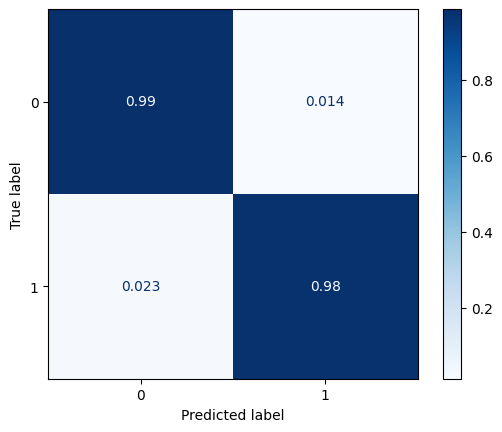

In [42]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true', cmap='Blues')

### EXTRA: 

Busca en Internet o pregúntale a tu AI preferida, cómo se graba un modelo en disco y gúardalo en "./models/cancer_pred" con la extesión apropiada.